In [4]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'craig-shaffer-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'NFL_2011_21.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading the datafile
games = pd.read_csv(file_content_stream)
games.head()

,Unnamed: 0,game_id,season,game_type,week,gameday,weekday,gametime,gametime_hour,gametime_minute,away_team,away_score,home_team,home_score,location,result,total,overtime,pfr,espn,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_qb_id,home_qb_id,referee,stadium_id,stadium,outdoor,grass,playoff,home_DVOA_Rank,home_DVOA,away_DVOA_Rank,away_DVOA,home_win,home_afterbye,away_afterbye,tie
0,1,2011_01_NO_GB,2011,REG,1,9/8/2011,Thursday,20:30,20,30,NO,34,GB,42,Home,8,76,0,201109080gnb,310908009,7,7,222,-250,4.5,100,-108,47.5,104,-115,0,outdoors,grass,68,5,00-0020531,00-0023459,Clete Blakeman,GNB00,Lambeau Field,1,1,0,2,0.26,1,0.29,1,0,0,0
1,2,2011_01_PIT_BAL,2011,REG,1,9/11/2011,Sunday,13:00,13,0,PIT,7,BAL,35,Home,28,42,0,201109110rav,310911033,7,7,113,-125,1.0,108,-117,37.0,-101,-109,1,outdoors,sportturf,75,2,00-0022924,00-0026158,Tony Corrente,BAL00,M&T Bank Stadium,1,0,0,8,0.14,3,0.22,1,0,0,0
2,3,2011_01_ATL_CHI,2011,REG,1,9/11/2011,Sunday,13:00,13,0,ATL,12,CHI,30,Home,18,42,0,201109110chi,310911003,7,7,-116,105,-1.0,-109,101,40.5,-101,-109,0,outdoors,grass,76,7,00-0026143,00-0024226,Ed Hochuli,CHI98,Soldier Field,1,1,0,15,0.01,7,0.17,1,0,0,0
3,4,2011_01_CIN_CLE,2011,REG,1,9/11/2011,Sunday,13:00,13,0,CIN,27,CLE,17,Home,-10,44,0,201109110cle,310911005,7,7,273,-310,6.5,109,-118,36.5,-101,-109,1,outdoors,grass,72,9,00-0027973,00-0027688,Bill Leavy,CLE00,Cleveland Browns Stadium,1,1,0,25,-0.15,17,-0.01,0,0,0,0
4,5,2011_01_IND_HOU,2011,REG,1,9/11/2011,Sunday,13:00,13,0,IND,7,HOU,34,Home,27,41,0,201109110htx,310911034,7,7,369,-430,9.0,-110,102,44.0,-106,-104,1,open,grass,70,0,00-0003292,00-0022787,Walt Coleman,HOU00,Reliant Stadium,0,1,0,5,0.20,32,-0.35,1,0,0,0


In [6]:
games=games.drop(columns = ['Unnamed: 0'],axis=1)

In [12]:
games_homewin = games.loc[games['home_win'] == 1]

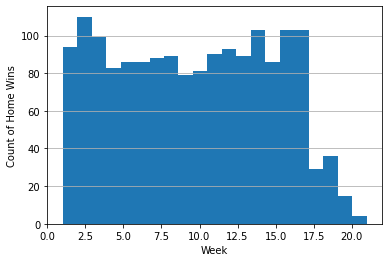

In [26]:
plt.hist(games_homewin['week'], bins = 21)
plt.xlabel('Week')
plt.ylabel('Count of Home Wins')

plt.grid(axis='y')
plt.show()

In [ ]:
plt.hist(games_homewin['season'], bins =11)
plt.xlabel('Season')
plt.ylabel('Count of Home Wins')

plt.grid(axis='y')
plt.show()

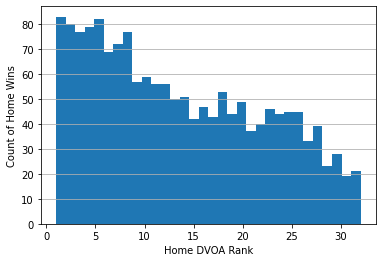

In [32]:
plt.hist(games_homewin['home_DVOA_Rank'], bins = 32)
plt.xlabel('Home DVOA Rank')
plt.ylabel('Count of Home Wins')

plt.grid(axis='y')
plt.show()

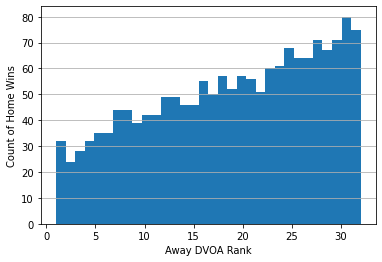

In [43]:
plt.hist(games_homewin['away_DVOA_Rank'], bins = 32)
plt.xlabel('Away DVOA Rank')
plt.ylabel('Count of Home Wins')

plt.grid(axis='y')
plt.show()

In [88]:
#homewins = 1646
#ties = 10
#homeloss= 1300

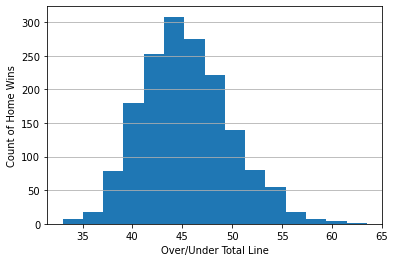

In [77]:
plt.hist(games_homewin['total_line'],bins=15)
plt.xlabel('Over/Under Total Line')
plt.ylabel('Count of Home Wins')
plt.grid(axis='y')
plt.show()

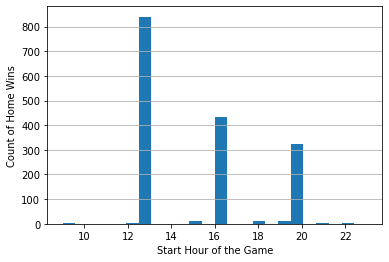

In [79]:
plt.hist(games_homewin['gametime_hour'],bins=24)
plt.xlabel('Start Hour of the Game')
plt.ylabel('Count of Home Wins')
plt.grid(axis='y')
plt.show()

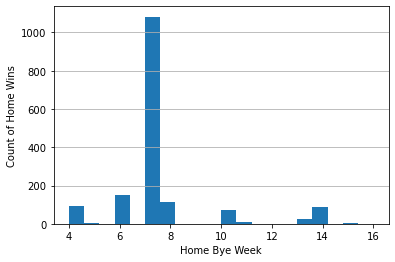

In [87]:
plt.hist(games_homewin['home_rest'],bins=20)
plt.xlabel('Home Bye Week')
plt.ylabel('Count of Home Wins')
plt.grid(axis='y')
plt.show()

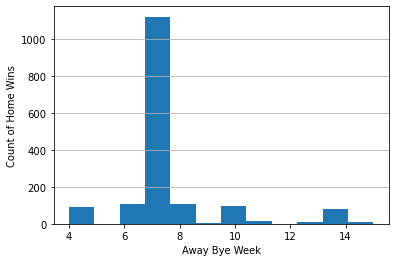

In [84]:
plt.hist(games_homewin['away_rest'],bins=12)
plt.xlabel('Away Bye Week')
plt.ylabel('Count of Home Wins')
plt.grid(axis='y')
plt.show()